# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

**Answer**  
This is a classification problem.  
The output of the problem is whether a student might need early intervention or not ('Yes' or 'No'), which is discreted.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [154]:
# Import libraries
import numpy as np
import pandas as pd
from IPython.display import display

In [155]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [156]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = (np.shape(student_data)[0])
n_features = (np.shape(student_data)[1] - 1)
n_passed = (len(student_data[(student_data['passed'] == 'yes')]))
n_failed = (len(student_data[(student_data['passed'] == 'no')]))
grad_rate = (float(len(student_data[(student_data['passed'] == 'yes')])) / float(n_students))  * 100.0
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [157]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father 

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [158]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [159]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=42)


print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

**Answer**  
Here I will first implement the codes for training and prediction. I will choose 3 supervised learning models and explain each of them soon.

In [160]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

# TODO: Choose a model, import it and instantiate an object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf  # you can inspect the learned model by printing it

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.003
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


In [161]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return f1_score(target, y_pred, pos_label='yes')

train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 1.0


In [162]:
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.621848739496


In [163]:
# Train and predict using different training set sizes
from IPython.display import display

def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    start = time.time()
    train_classifier(clf, X_train, y_train)
    end = time.time()
    train_time = (end - start)
    train_f1_score = predict_labels(clf, X_train, y_train)
    test_f1_score = predict_labels(clf, X_test, y_test)
    print "F1 score for training set: {}".format(train_f1_score)
    print "F1 score for test set: {}".format(test_f1_score)
    return [len(X_train), train_f1_score, test_f1_score, train_time]

In [164]:
# Note: Keep the test set constant
# This is a function to run the help function three times with different training size #
def train_different_size(clf, X_train, y_train, X_test, y_test):
    result_statistic = []      # initialize a statistic array 
    for i in range(1, 4):
        trainingSize = (i*100)
        X_train_partial = X_train.head(trainingSize)
        y_train_partial = y_train.head(trainingSize)
        # Run the helper function for desired subsets of training data and push the result to the record array
        result_statistic.append(train_predict(clf, X_train_partial, y_train_partial, X_test, y_test))
    # convert the statistic record array to a panda dataframe 
    df_result_statistic = pd.DataFrame(result_statistic)
    
    # formatting the dataframe for visualizawtion 
    df_result_statistic.columns = ['training_size', 'train_f1_score', 'test_f1_score', 'training_time (secs)']
    df_result_statistic = df_result_statistic.set_index('training_size')
    return (df_result_statistic)

# Model I. Decision Tree Classifier
Decision Tree is generally used in data mining and decision analysis.  
For example, I run a shopping website. I have the personal information and the buying history of each user. I want to retrieve the features and the decision converage from the data that play important roles to decide the buying behaviour. 

* **Strength**
 * A decision tree can be visualized in graphics so that we can understand and interpret the data very well.
  
* **Weakness**
 * It may suffer from overfitting when we have too many features.

Besides knowing whether a student might need early intervention, I also want to know how and by what factor does the decision made. For example, the model might tell me Bob studies less than 15 minutes every day so he needs early intervention. It will be more valuable than just telling me that Bob needs early intervention. 

In [165]:
clf_decisionTree = DecisionTreeClassifier(max_depth=4)
display(train_different_size(clf_decisionTree, X_train, y_train, X_test, y_test))

------------------------------------------
Training set size: 100
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.002
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.875912408759
F1 score for test set: 0.75
------------------------------------------
Training set size: 200
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.001
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.875816993464
F1 score for test set: 0.772413793103
------------------------------------------
Training set size: 300
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.001
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
Predicting labe

,train_f1_score,test_f1_score,training_time (secs)
training_size,,,
100,0.875912,0.750000,0.001887
200,0.875817,0.772414,0.001437
300,0.854545,0.770370,0.000622


# Model II. Naive Bayes
Naive Bayes is generally very useful on text classification problems such as email spam detection and classifying a piece of article from different categories (sports, entertainment, finance and so on)  

* **Strengths**
 * The feaures for text classification are usually very high in dimension. Naive Bayes performs well under this critera.
 * It is also good at dealing with noisy dataset. 

* **Weakness**
 * The features should be independent to each other to classify well.
 * In text classification problem. Naive Bayes does not care about the word order. For example: when we say 'coffee cup' and 'cup coffee', they are two different things. 'Coffee cup' is the cup for coffee and 'Cup coffee' is a cup of coffee. However, Naive Bayes will give the same results for these two terms.
 
I want to use Naive Bayes on the data as the data contains 48 feature columns which is quite many I think.

In [166]:
from sklearn.naive_bayes import GaussianNB
clf_naiveBayes = GaussianNB()
display(train_different_size(clf_naiveBayes, X_train, y_train, X_test, y_test))

------------------------------------------
Training set size: 100
Training GaussianNB...
Done!
Training time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.000
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.846715328467
F1 score for test set: 0.802919708029
------------------------------------------
Training set size: 200
Training GaussianNB...
Done!
Training time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.840579710145
F1 score for test set: 0.724409448819
------------------------------------------
Training set size: 300
Training GaussianNB...
Done!
Training time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.000
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.000
F1 score for training set: 

,train_f1_score,test_f1_score,training_time (secs)
training_size,,,
100,0.846715,0.802920,0.000902
200,0.840580,0.724409,0.001336
300,0.803783,0.763359,0.000540


# Model III. Support Vector Machine
Suppoer Vector Machine, SVM in short is generally used in classification problems.  
SVM maximizes the space between the decision boundaries and the data so that decrease the chance of mis-classification. 
 * **Strengths**
  * Works well in complicated domain where there is clear margin of separation.
  * We can get nonlinear decision boundary with SVM.
 * **Weakness**
  * The training time is about the cubic of the size of data so SVM trains slowly on large datasets.
  * SVM does not work well with very noisy data where the class are very overlapping. 
  
We have only 395 data samples, which is not a large set so we do not need to concern about the speed problem. Moreover, we have 2 classes to classify so I think SVM might be a good model for it.

In [167]:
from sklearn import svm
clf_SVM = svm.SVC()
display(train_different_size(clf_SVM, X_train, y_train, X_test, y_test))

------------------------------------------
Training set size: 100
Training SVC...
Done!
Training time (secs): 0.003
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.877697841727
F1 score for test set: 0.774647887324
------------------------------------------
Training set size: 200
Training SVC...
Done!
Training time (secs): 0.002
Predicting labels using SVC...
Done!
Prediction time (secs): 0.003
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.867924528302
F1 score for test set: 0.781456953642
------------------------------------------
Training set size: 300
Training SVC...
Done!
Training time (secs): 0.007
Predicting labels using SVC...
Done!
Prediction time (secs): 0.005
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.876068376068
F1 score for test set: 0.783783783784


,train_f1_score,test_f1_score,training_time (secs)
training_size,,,
100,0.877698,0.774648,0.003278
200,0.867925,0.781457,0.002306
300,0.876068,0.783784,0.007239


## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

**Answer**  
Let me first wrap up a bit for the experiments I done above.  
The three classifiers are **decision tree, naive bayes and SVM**.  
To decide a model as the best model. I am going to compare the models in terms of the accuracy, training time and input data properties.
 
* **Accuracy**
 * I run the training several times and the mean of the f1 scores of the three models on 300 data points are 0.76, 0.76 and 0.78 respectively. 
 * The score had only a small difference, it may only affected by 1~2 data samples, which is minor.  
  
  
* **Training time**
 * The training time of the three models on 300 data points are 0.001, 0.0005 and 0.007 seconds respectively.
 * NB is the least time-consuming while SVM is the most.
 * I do not concern on the training time too much as the data size is small and even I use the most time-consuming model, my machine is still affordable.
  
  
* **Input Data**
 * Our input data has the following properties:
   * Our data has many features but few samples.
   * In my observation, the data is noisy as many features (like sex and address) is not correlated with the output label.
 
Because of the noisy data, I will not choose SVM as it has the risk on overfitting.  
As I mentioned above, I concern more on how the data is classified, by which features and by what values. As a result, I will choose decision tree as my best model.

Here, I am going to visualize a decision tree and explain how an unseen data is predicted by the tree. Below shows the decision tree before fine tuning.

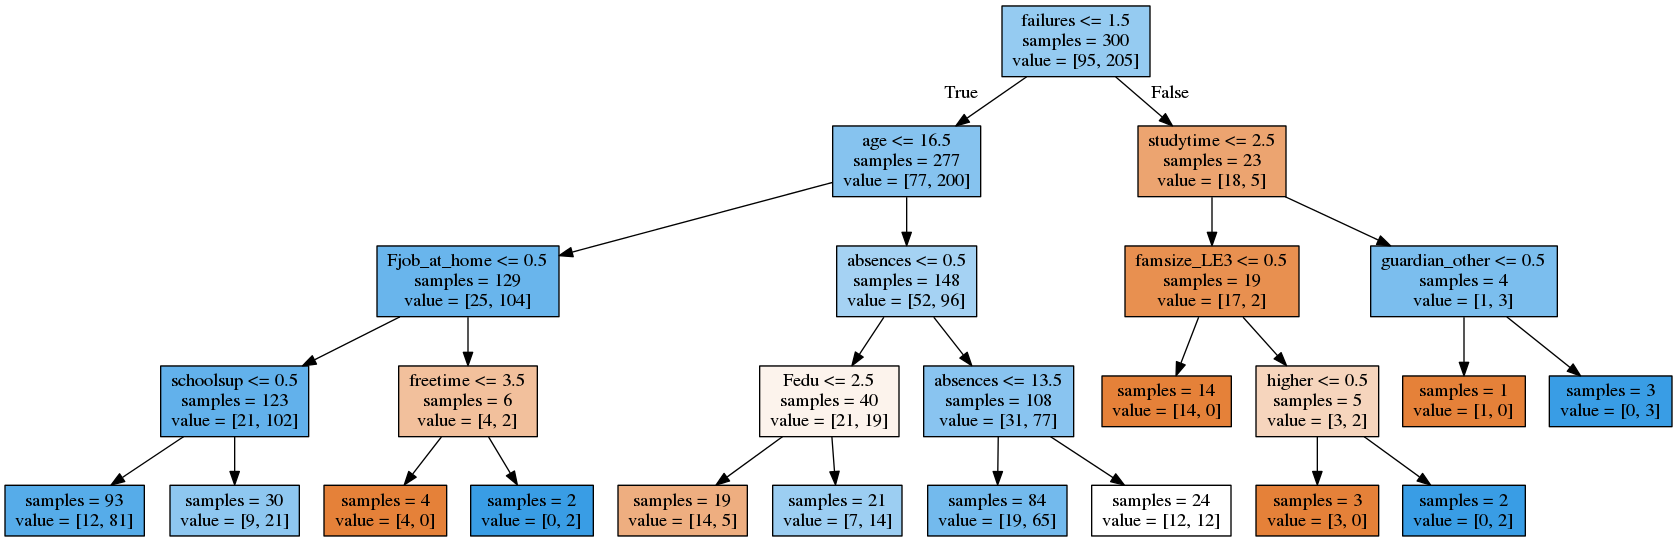

In [168]:
from sklearn import tree
from IPython.display import Image
import os
tree.export_graphviz(clf_decisionTree, out_file='decisionTreeBeforeFineTuning.dot', filled=True, impurity=False, feature_names=list(X_train.columns))
os.system('dot -Tpng decisionTreeBeforeFineTuning.dot -o decisionTreeBeforeFineTuning.png')
Image(filename='decisionTreeBeforeFineTuning.png')

We now have an unseen data, with the same 48 features. The following is the process of prediction.
 * We started the prediction at the root node.
 * We see a statement written "failures <= 1.5"
 * Check the feature "failure" from the unseen data, is it less than 1.5? 
 * If the answer is True, go to the left child node, otherwise, go to the right child node.
 * Continue with the question answering until you reached a leaf. A leaf has no questions but a decision.
 * The decision has a value consisting with two numbers: [a, b] indicating the number of data points of [Fail, Pass]
 * For example: you reached a leaf with value = [7, 72], it has a higher chance that the student will pass the exam as 72 out of 79 students under the same conditional path also pass the exam. 
 * We can say that the student is likely to pass the exam with a probability of 72/79.
 

In [169]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import make_scorer

# The final selected model is decision tree classifier #
finalSelectedModel = DecisionTreeClassifier()

# Here is the parameters I am going to try, max_depth from 1~12, min_sample_splits from 1~12, min_samples_leaf from 1~12 #
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_split': [1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12]
             }

# This is the perform metric used to evaluate the performance of the model, actually it is a f1 scorer #
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    return f1_score(y_true, y_predict, pos_label='yes')

# make the scorer for cross validation #
score_function = make_scorer(performance_metric, greater_is_better=True)

# create a gridSearchCV with the scoring function and parameters I designed above #
reg = GridSearchCV(estimator=finalSelectedModel, param_grid=parameters, scoring=score_function)
reg.fit(X_train, y_train)

# fit the gridSearchCV and get the best estimator and finally fit the data with the best estimator #
bestEstimator = (reg.best_estimator_)
df_final_result = train_predict(bestEstimator, X_train, y_train, X_test, y_test)

print (bestEstimator)
display(df_final_result)

------------------------------------------
Training set size: 300
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.001
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.829875518672
F1 score for test set: 0.8
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=6,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


[300, 0.82987551867219922, 0.80000000000000016, 0.0008940696716308594]

### Visualizing the Decision Tree 
Then, I visualize the Final decision tree  below. As we can see in the diagram, only 3 features (out of 48) are important to predict whether a student will pass the course to guarantee a test f1 score 0.8.  
If I were the teacher of the students, next time when I met a student who failed a course more than two times, it raised me a signal that the student may need early intervention.

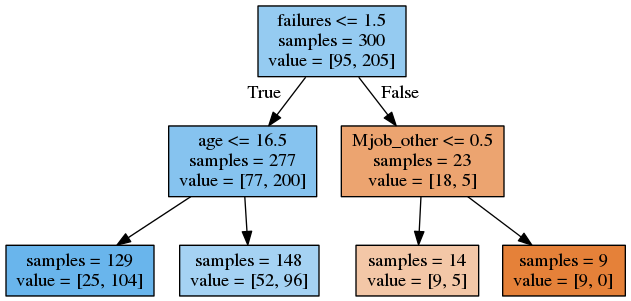

In [170]:
tree.export_graphviz(bestEstimator, out_file='bestDecisionTree.dot', filled=True, impurity=False, feature_names=list(X_train.columns))
os.system('dot -Tpng bestDecisionTree.dot -o bestDecisionTree.png')
Image(filename='bestDecisionTree.png')

# The Final Testing F1 Score

In [171]:
print ("The Final Testing F1 Score is %f" % (df_final_result[2]))

The Final Testing F1 Score is 0.800000
